## 1. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
#Create a path to where the data is stored.
path = r'/Users/vicky/OneDrive/文件/careerfoundry/Machine Learning with Python/Datasets'

In [3]:
# Ensures the charts created are displayed in the notebook without the need to "call" them.
%matplotlib inline

In [4]:
#Read in the European weather data.
climate = pd.read_csv(os.path.join(path,'Dataset-weather-prediction-dataset-processed.csv'))
climate

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [5]:
#Read in the pleasant weather data.
pleasant = pd.read_csv(os.path.join(path,'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pleasant

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2. Create Dataframe for the task.

In [6]:
list(climate.columns)

['DATE',
 'MONTH',
 'BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 

In [7]:
# remove 3 non-pertinent columns (GDANSK, ROMA & TOURS) and Month
df = climate.drop(['MONTH',
 'GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
 'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max'], axis=1)

In [8]:
df

,DATE,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,6.5,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,6.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,8.5,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,6.3,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,3.0,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,15.9,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,16.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,16.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,15.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [9]:
# Convert 'DATE' to datetime format (specifying format)
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
pleasant['DATE'] = pd.to_datetime(pleasant['DATE'], format='%Y%m%d')

In [10]:
#creating a sub-data frame with 2016-2020 records
dfyear = df[(df['DATE'].dt.year >= 2016) & (df['DATE'].dt.year <= 2020)]
pleasant_year = pleasant[(pleasant['DATE'].dt.year >= 2016) & (df['DATE'].dt.year <= 2020)]

In [11]:
dfyear.shape

(1827, 148)

In [12]:
pleasant_year.shape

(1827, 16)

In [13]:
#Create an 'X' matrix by dropping the unneeded columns.
X = dfyear.drop(['DATE'], axis=1)
y = pleasant_year.drop(['DATE'], axis=1)

In [14]:
print(X.shape)
print(y.shape)

(1827, 147)
(1827, 15)


## 3. Scaling data

In [15]:
#Scaling the data
scaler = StandardScaler()

#Fit the dfyear dataframe
scaler.fit(X)

#Scaling the X data
X_sc = scaler.transform(X)

print(X_sc[:3])

[[-9.73985599e-01  6.97520728e-01  1.56397661e+00  9.63733874e-01
  -8.28834424e-01 -3.30525301e-02 -1.19569933e-01 -9.76673753e-01
  -9.46397687e-01 -7.49587950e-01 -1.06996671e+00  8.39681961e-02
  -3.31195304e-01  1.71028208e+00 -1.25836285e+00 -3.66935195e-01
   2.06500462e-01 -1.97518008e+00 -2.25671403e+00 -2.01035195e+00
   0.00000000e+00  1.11022302e-16  2.22044605e-16 -2.22044605e-16
  -3.34425236e-01 -8.88178420e-16 -1.99809996e+00 -2.10276136e+00
  -2.03944656e+00  4.19900470e-01 -2.60688213e-01  1.59674215e+00
   6.51689911e-01 -9.32570449e-01 -5.03347298e-01 -1.19485053e+00
  -1.14610221e+00 -1.23691881e+00 -1.07914926e+00  3.68891822e-01
   3.84798452e-02  1.00530551e+00  7.85495395e-01 -1.04544851e+00
  -4.82178886e-01 -8.32174343e-02 -8.38827076e-01 -8.67008918e-01
  -5.24992218e-01 -1.03319735e+00  3.92679581e-01  1.21463660e+00
   1.56983470e-01 -1.17181314e+00  3.02932163e-01 -4.44334746e-02
  -1.06244117e+00 -1.15492798e+00 -1.30399043e+00 -7.55574365e-01
  -2.34018

In [16]:
#Assign the scaled data to DataFrames
X_df = pd.DataFrame(X_sc, index=X.index, columns=X.columns)

In [17]:
X_df

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
20454,-0.973986,0.697521,1.563977,0.963734,-0.828834,-0.033053,-0.11957,-0.976674,-0.946398,-0.749588,...,0.0,-2.220446e-16,-2.220446e-16,-1.355368,-1.110223e-16,0.0,8.881784e-16,1.776357e-15,-8.881784e-16,0.0
20455,0.751563,1.100452,1.481082,-0.334035,-1.401475,1.677021,-0.11957,-0.366211,-0.797705,-0.406074,...,0.0,-2.220446e-16,-2.220446e-16,-1.111537,-1.110223e-16,0.0,8.881784e-16,1.776357e-15,-8.881784e-16,0.0
20456,0.751563,-0.309807,0.652133,-1.252268,-0.794476,2.190043,-0.11957,-0.388013,-0.824740,-0.609059,...,0.0,-2.220446e-16,-2.220446e-16,-1.214203,-1.110223e-16,0.0,8.881784e-16,1.776357e-15,-8.881784e-16,0.0
20457,1.182950,0.596788,0.900818,-2.647981,-0.828834,1.249503,-0.11957,-0.976674,-0.811222,-0.546602,...,0.0,-2.220446e-16,-2.220446e-16,-1.162870,-1.110223e-16,0.0,8.881784e-16,1.776357e-15,-8.881784e-16,0.0
20458,0.320176,-0.612005,1.066608,-2.403119,-0.760118,0.736481,-0.11957,-1.085685,-0.851775,-0.530988,...,0.0,-2.220446e-16,-2.220446e-16,-1.085871,-1.110223e-16,0.0,8.881784e-16,1.776357e-15,-8.881784e-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22276,1.182950,2.913642,-0.259710,-2.084799,-1.367117,0.415842,-0.11957,-1.129289,-1.351924,-1.686445,...,0.0,-2.220446e-16,-2.220446e-16,0.030618,-1.110223e-16,0.0,8.881784e-16,1.776357e-15,-8.881784e-16,0.0
22277,0.751563,1.604116,0.071869,-4.276314,-1.367117,-0.225436,-0.11957,-1.042080,-0.959915,-0.827659,...,0.0,-2.220446e-16,-2.220446e-16,0.030618,-1.110223e-16,0.0,8.881784e-16,1.776357e-15,-8.881784e-16,0.0
22278,0.320176,1.604116,0.071869,-2.843871,-1.378570,0.009699,-0.11957,-1.085685,-0.986950,-0.874502,...,0.0,-2.220446e-16,-2.220446e-16,0.030618,-1.110223e-16,0.0,8.881784e-16,1.776357e-15,-8.881784e-16,0.0
22279,0.320176,-0.410540,0.983713,-1.325726,-1.298400,-0.375067,-0.11957,-1.063883,-1.230266,-1.046259,...,0.0,-2.220446e-16,-2.220446e-16,0.030618,-1.110223e-16,0.0,8.881784e-16,1.776357e-15,-8.881784e-16,0.0


## 4. Create dendrograms

Text(0.5, 0.98, 'All Weather Stations - Dendrogram Single Method')

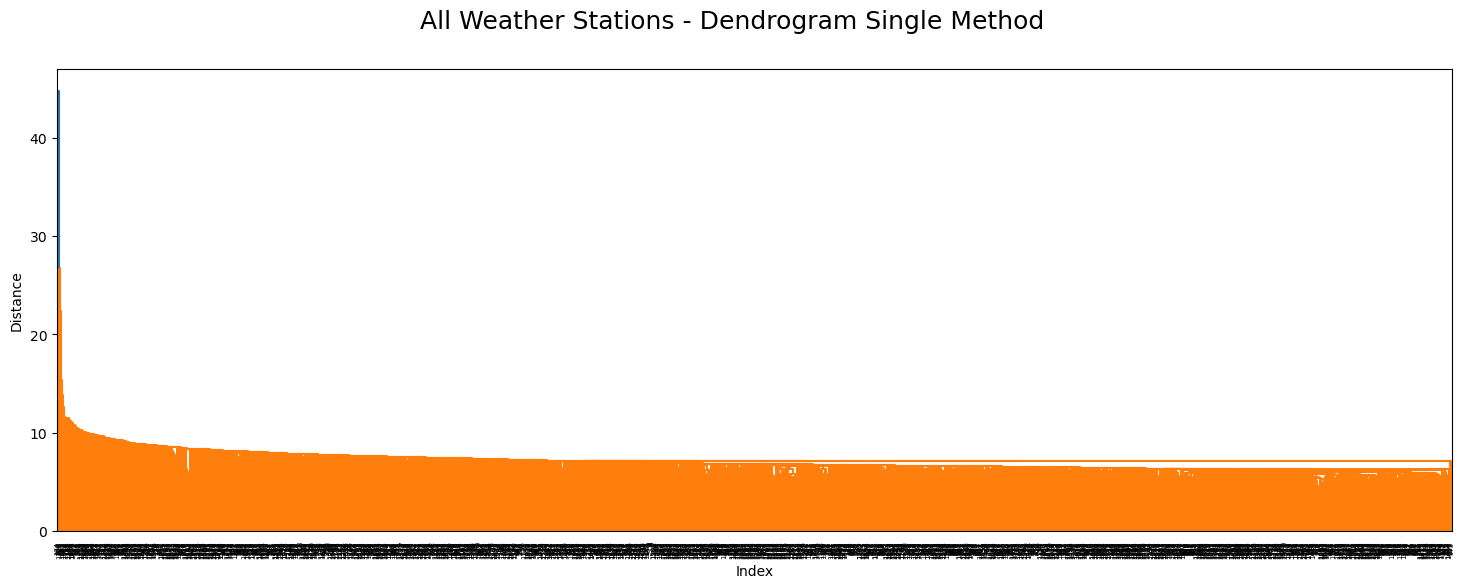

In [18]:
## Single
distance_single = linkage(X_df, method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weather Stations - Dendrogram Single Method",fontsize=18)

Text(0.5, 0.98, 'All Weather Stations - Dendrogram Complete Method')

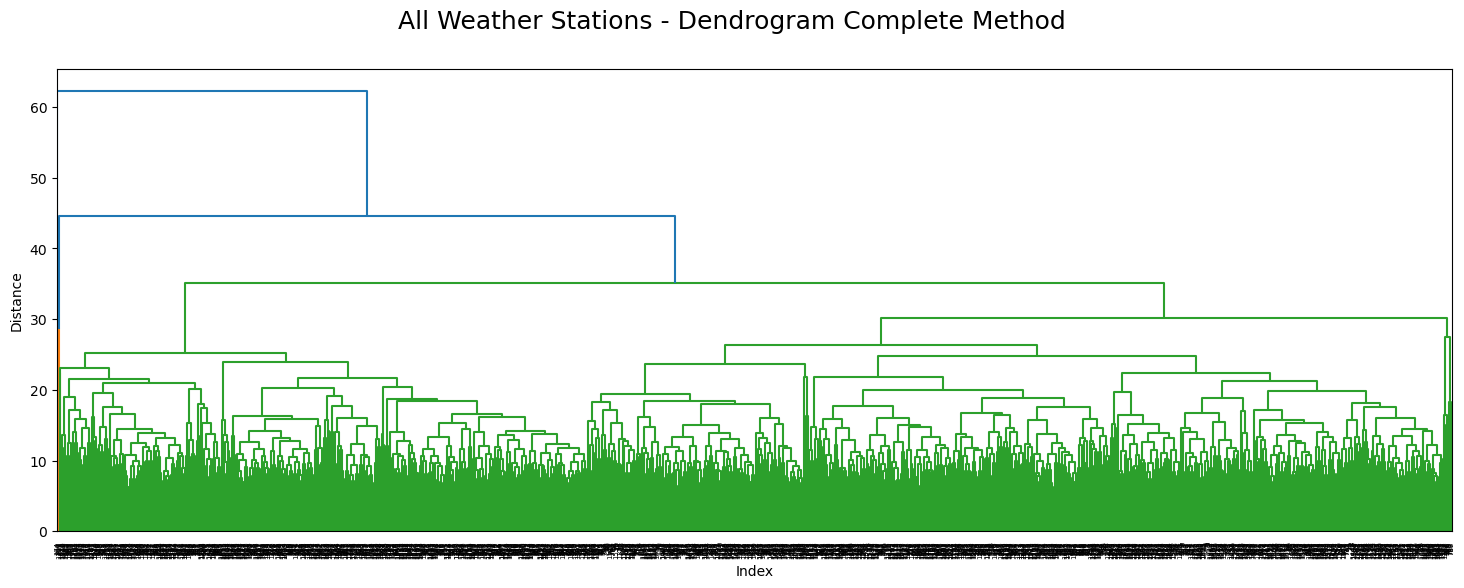

In [19]:
## Complete
distance_complete = linkage(X_df, method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weather Stations - Dendrogram Complete Method",fontsize=18)

Text(0.5, 0.98, 'All Weather Stations - Dendrogram Average Method')

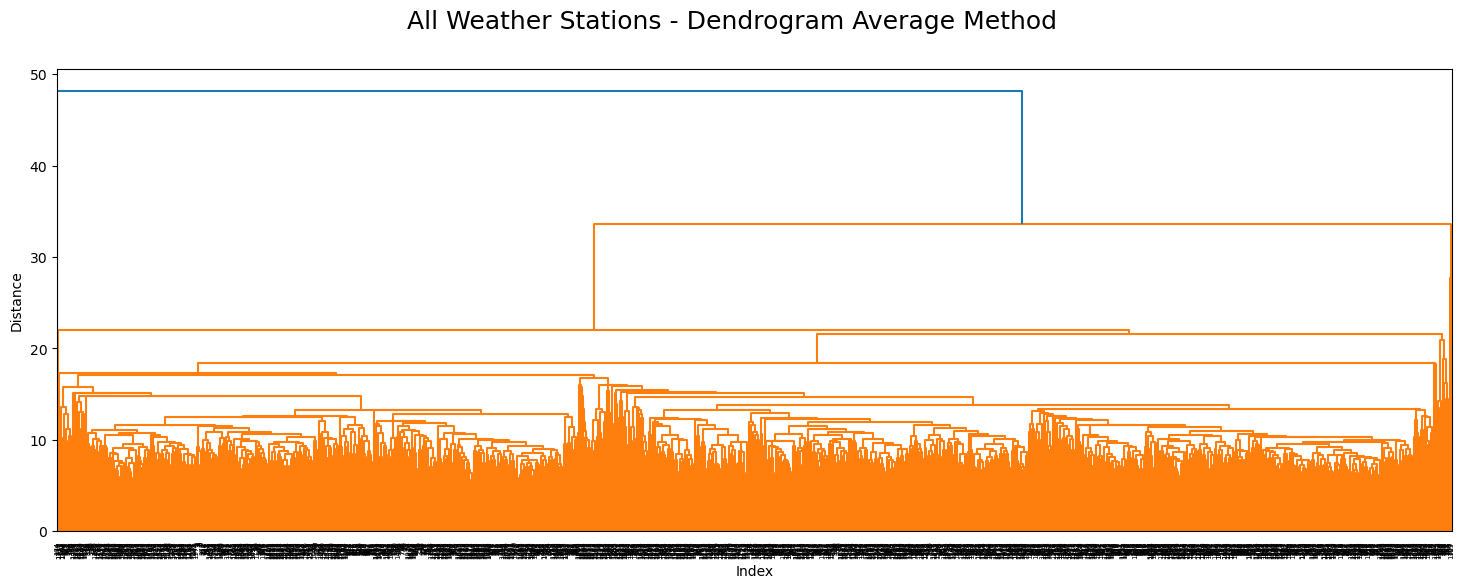

In [20]:
## Average
distance_average = linkage(X_df, method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weather Stations - Dendrogram Average Method",fontsize=18)

Text(0.5, 0.98, 'All Weather Stations - Dendrogram Ward Method')

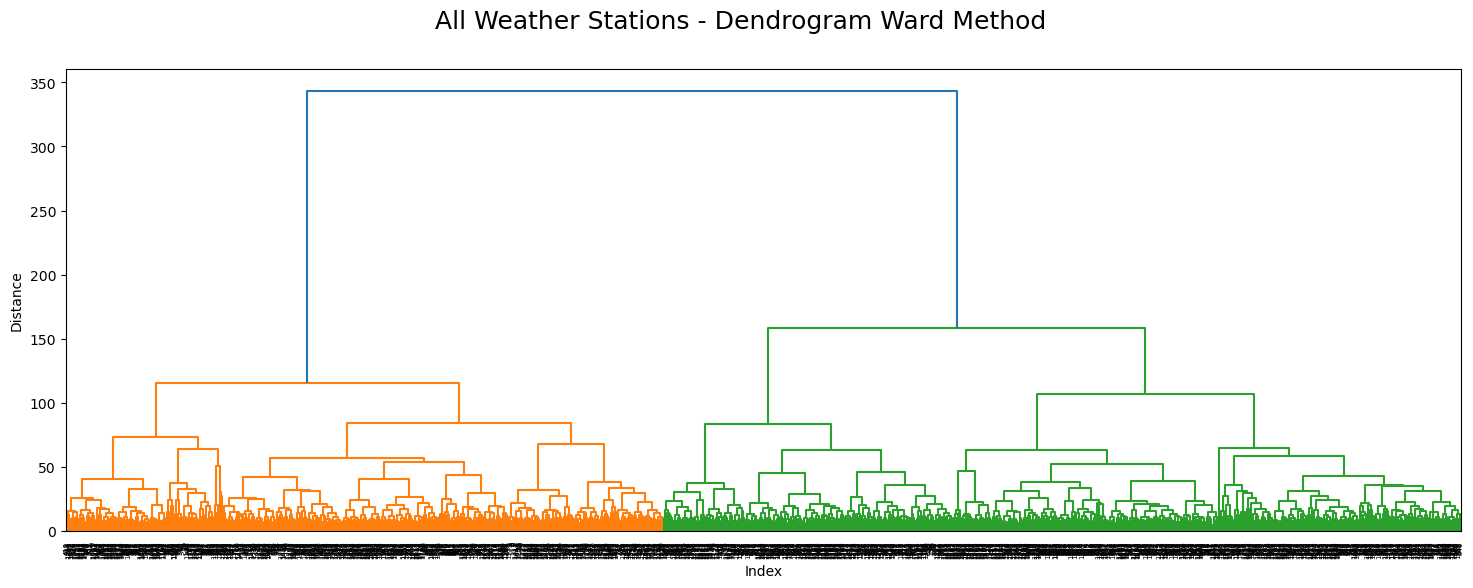

In [21]:
## Ward
distance_ward = linkage(X_df, method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weather Stations - Dendrogram Ward Method",fontsize=18)

## 5. Dimensionality reduction

In [22]:
#Run the PCA model, reducing to 15 (since there is 15 weather stations)
pca = PCA(n_components=15)
principalComponents = pca.fit_transform(X_df)

In [23]:
principalComponents

array([[ -9.21427004,   2.54415643,  -2.50494436, ...,  -0.36753324,
          0.17109475,  -0.030328  ],
       [-10.24234456,  -1.41050479,  -0.9610744 , ...,  -1.77446571,
         -1.04070274,   0.4779783 ],
       [-10.87177407,  -3.14114971,   0.25211066, ...,  -1.43504683,
          0.67888869,  -1.01032856],
       ...,
       [ -8.6043917 ,  -6.7153862 ,   3.37856843, ...,   0.673535  ,
         -0.66148991,   1.97682877],
       [ -8.40159334,  -3.85190311,   1.38457518, ...,   0.02319562,
         -2.2105695 ,  -0.4256657 ],
       [ -9.46358245,  -2.71698381,   0.49656119, ...,  -0.4598521 ,
         -0.76637802,   0.77192309]])

In [24]:
#Make a dataframe of the new components
dfPCA = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2','PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12', 'PCA13', 'PCA14', 'PCA15'])

In [25]:
dfPCA

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15
0,-9.214270,2.544156,-2.504944,-0.980997,-2.949302,0.039803,-0.489691,0.862212,0.302763,-0.907268,0.927055,0.553889,-0.367533,0.171095,-0.030328
1,-10.242345,-1.410505,-0.961074,-0.365934,-1.836322,-0.139891,0.319441,3.372278,0.217801,0.353760,1.185853,-0.756967,-1.774466,-1.040703,0.477978
2,-10.871774,-3.141150,0.252111,1.850803,-1.978787,0.570609,0.231077,4.405807,-0.471548,0.724833,2.566818,0.290692,-1.435047,0.678889,-1.010329
3,-10.993187,-5.347129,2.538222,3.297683,-2.747994,1.944896,1.558710,1.892437,-2.295440,0.664017,0.802412,1.258488,-1.979520,1.071178,-1.224811
4,-9.855844,-3.664555,1.798172,2.224644,-2.079176,1.824686,2.606798,2.043608,-1.919397,0.669961,-0.896035,-0.581784,-2.690749,0.282010,-1.335257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,-9.982214,-6.604382,-0.611659,7.815648,1.554908,-2.099191,0.054653,1.987338,-0.529189,0.582777,2.564173,1.497959,-0.366272,-1.742004,1.208669
1823,-9.134901,-8.936633,4.752677,3.381131,-2.126866,0.450072,4.204049,-2.430139,-2.602948,1.465560,-0.351420,-1.067530,-0.527387,-0.549638,1.923694
1824,-8.604392,-6.715386,3.378568,2.569495,-1.750550,0.362160,2.308929,-2.472176,-2.723361,0.270291,-0.587944,-0.670359,0.673535,-0.661490,1.976829
1825,-8.401593,-3.851903,1.384575,0.348153,-0.174566,0.050641,2.197399,-1.249699,-2.062086,0.614417,-1.071769,-0.261720,0.023196,-2.210570,-0.425666


In [26]:
## Exporting PCA'd dataset to csv file
dfPCA.to_csv(os.path.join(path, '2016_2020_PCA.csv'))

Text(0.5, 0.98, 'All Weather Stations - Dendrogram Single Method')

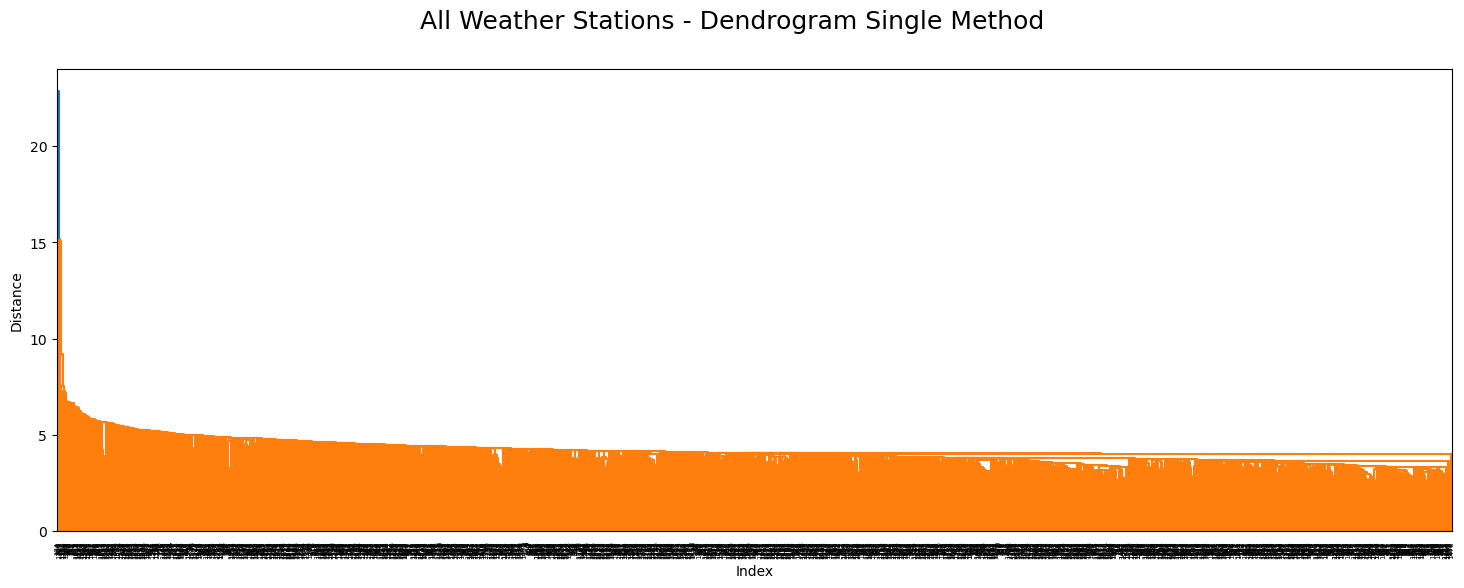

In [27]:
## Single
distance_single = linkage(dfPCA, method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weather Stations - Dendrogram Single Method",fontsize=18)

Text(0.5, 0.98, 'All Weather Stations - Dendrogram Complete Method')

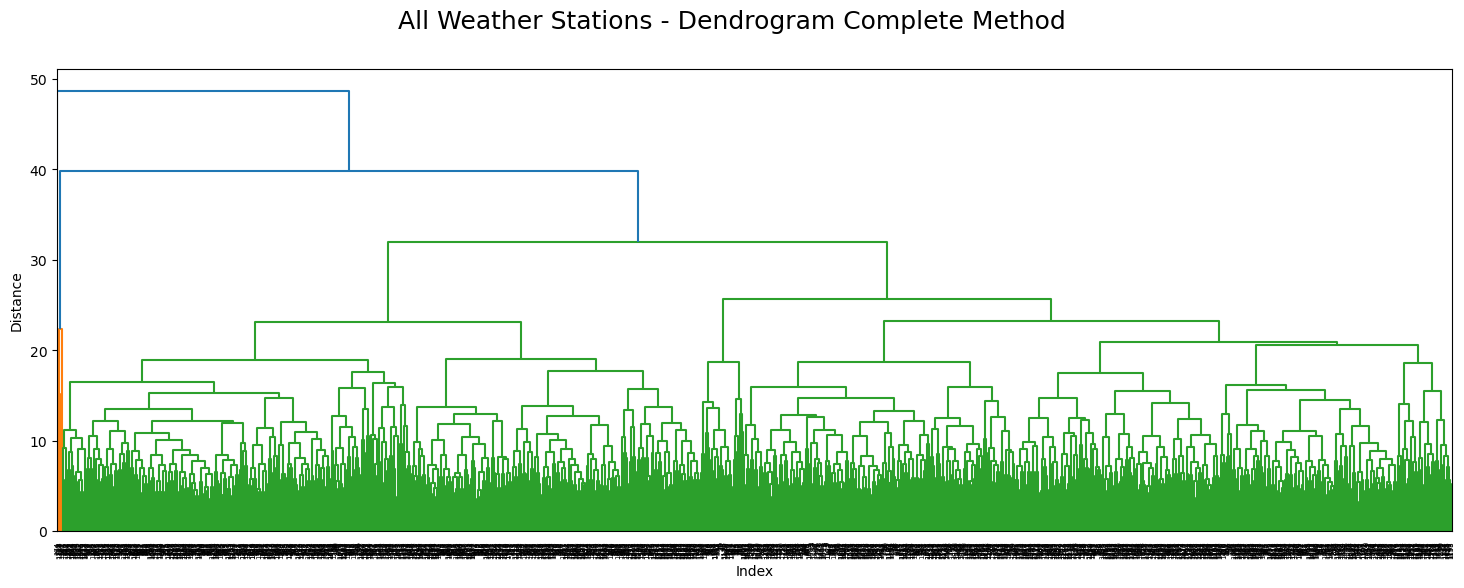

In [28]:
## Complete
distance_complete = linkage(dfPCA, method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weather Stations - Dendrogram Complete Method",fontsize=18)

Text(0.5, 0.98, 'All Weather Stations - Dendrogram Average Method')

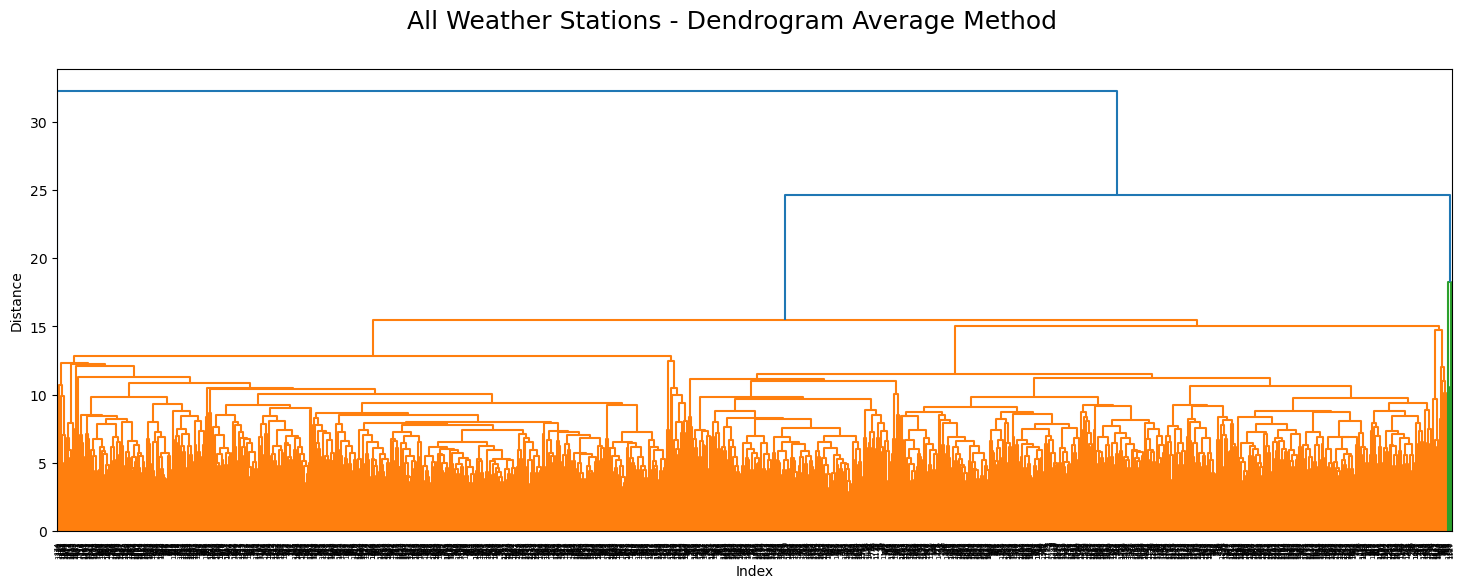

In [29]:
## Average
distance_average = linkage(dfPCA, method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weather Stations - Dendrogram Average Method",fontsize=18)

Text(0.5, 0.98, 'All Weather Stations - Dendrogram Ward Method')

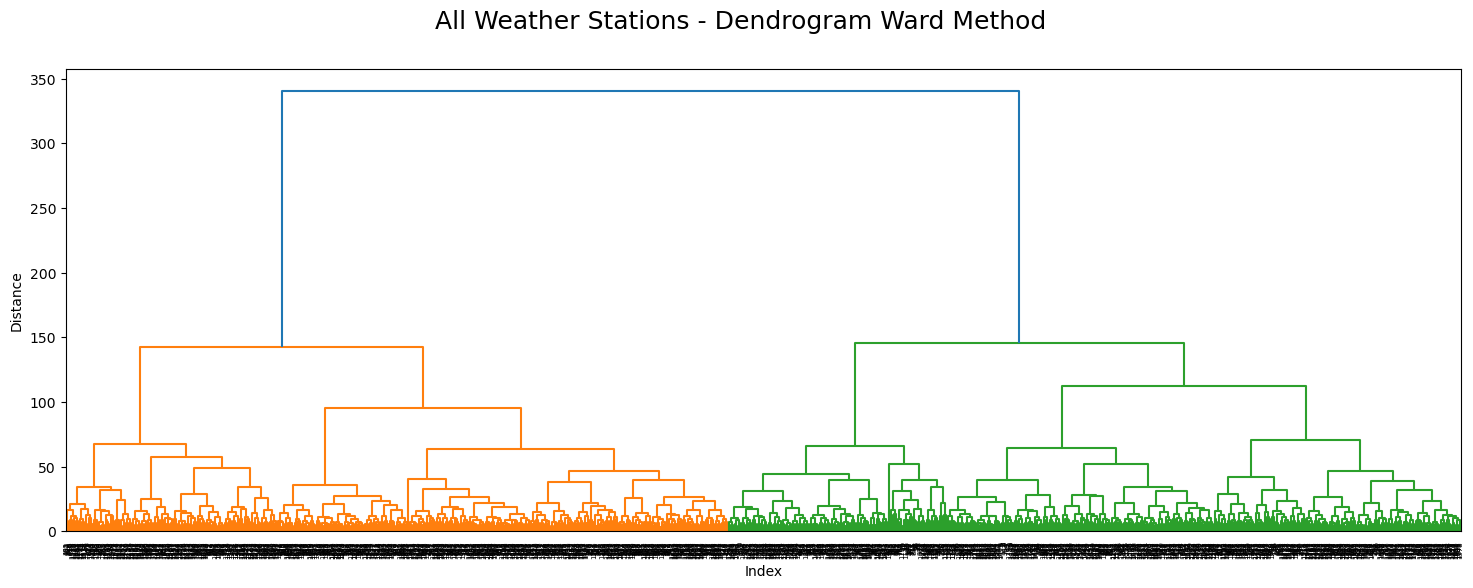

In [30]:
## Ward
distance_ward = linkage(dfPCA, method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weather Stations - Dendrogram Ward Method",fontsize=18)

## 6. ReRun the PCA model, reducing to 2

In [31]:
#Run the PCA model, reducing to 2 
pca2 = PCA(n_components=2)
principalComponents2 = pca2.fit_transform(X_df)

In [32]:
principalComponents2

array([[ -9.21426998,   2.5441345 ],
       [-10.24234445,  -1.41054299],
       [-10.87177396,  -3.14118078],
       ...,
       [ -8.60439167,  -6.71540072],
       [ -8.40159337,  -3.85189083],
       [ -9.46358244,  -2.71699172]])

In [33]:
#Make a dataframe of the new components
dfPCA2 = pd.DataFrame(principalComponents2, columns=['PCA1', 'PCA2'])

In [34]:
dfPCA2

,PCA1,PCA2
0,-9.214270,2.544134
1,-10.242344,-1.410543
2,-10.871774,-3.141181
3,-10.993187,-5.347170
4,-9.855844,-3.664595
...,...,...
1822,-9.982214,-6.604382
1823,-9.134901,-8.936633
1824,-8.604392,-6.715401
1825,-8.401593,-3.851891


Text(0.5, 0.98, 'All Weather Stations - Dendrogram Single Method')

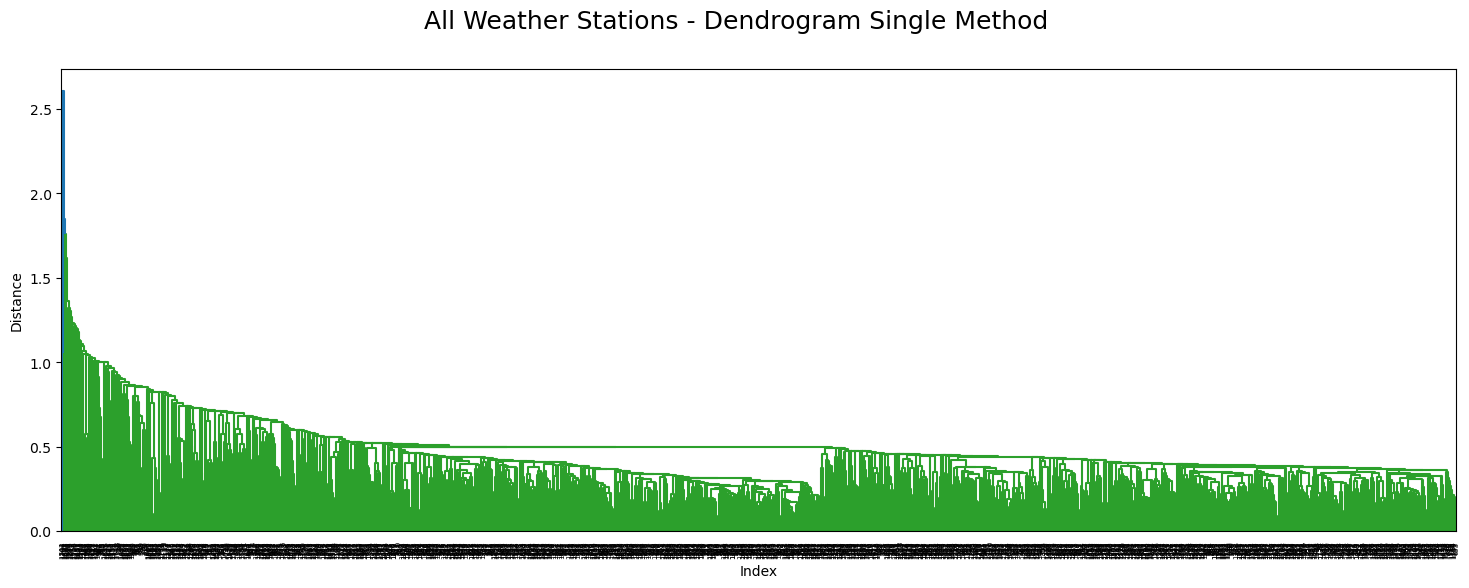

In [35]:
## Single
distance_single = linkage(dfPCA2, method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weather Stations - Dendrogram Single Method",fontsize=18)

Text(0.5, 0.98, 'All Weather Stations - Dendrogram Complete Method')

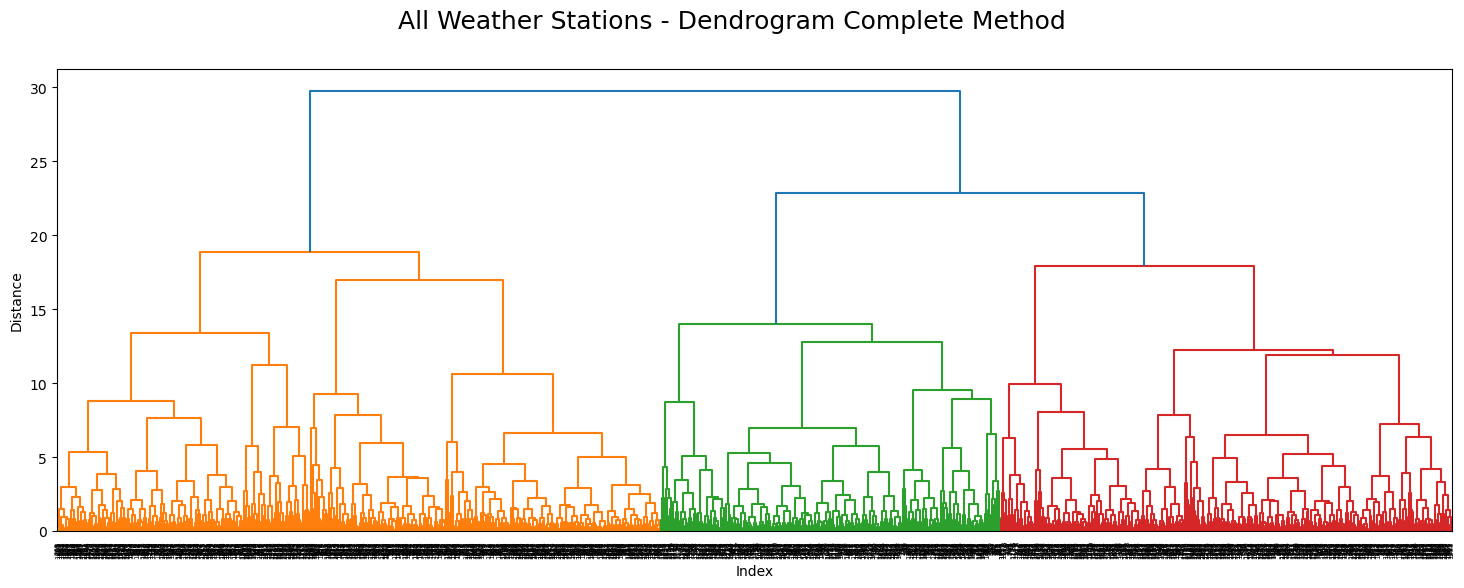

In [36]:
## Complete
distance_complete = linkage(dfPCA2, method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weather Stations - Dendrogram Complete Method",fontsize=18)

Text(0.5, 0.98, 'All Weather Stations - Dendrogram Average Method')

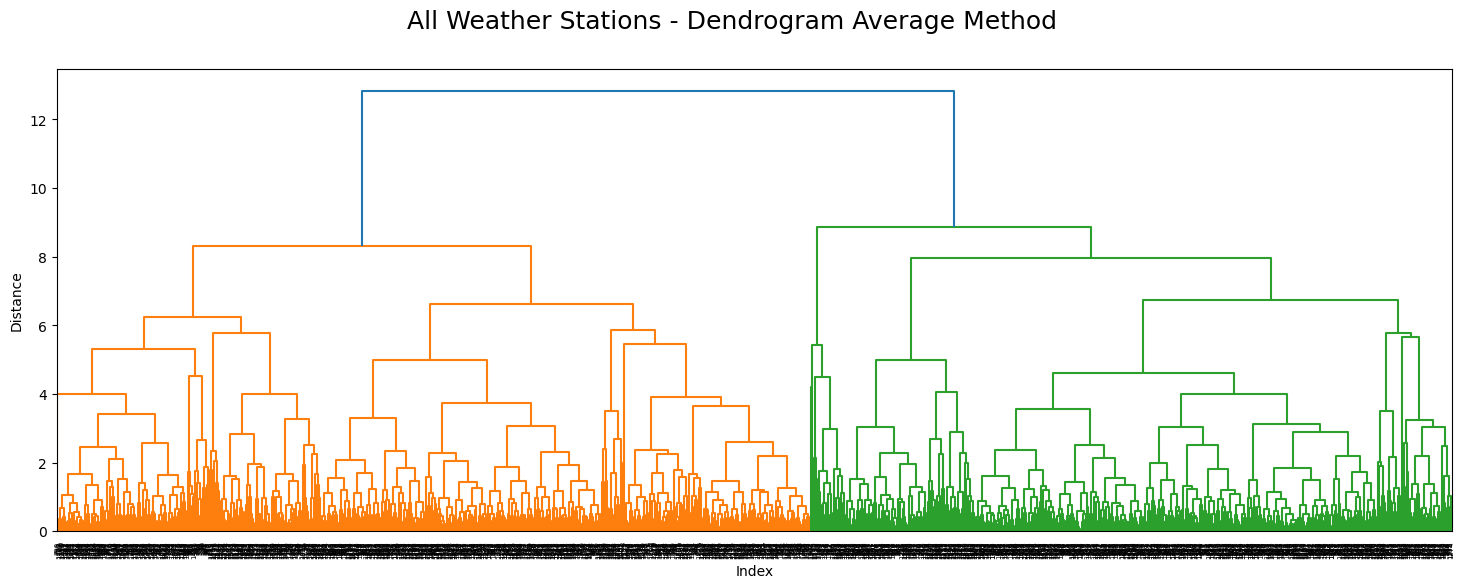

In [37]:
## Average
distance_average = linkage(dfPCA2, method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weather Stations - Dendrogram Average Method",fontsize=18)

Text(0.5, 0.98, 'All Weather Stations - Dendrogram Ward Method')

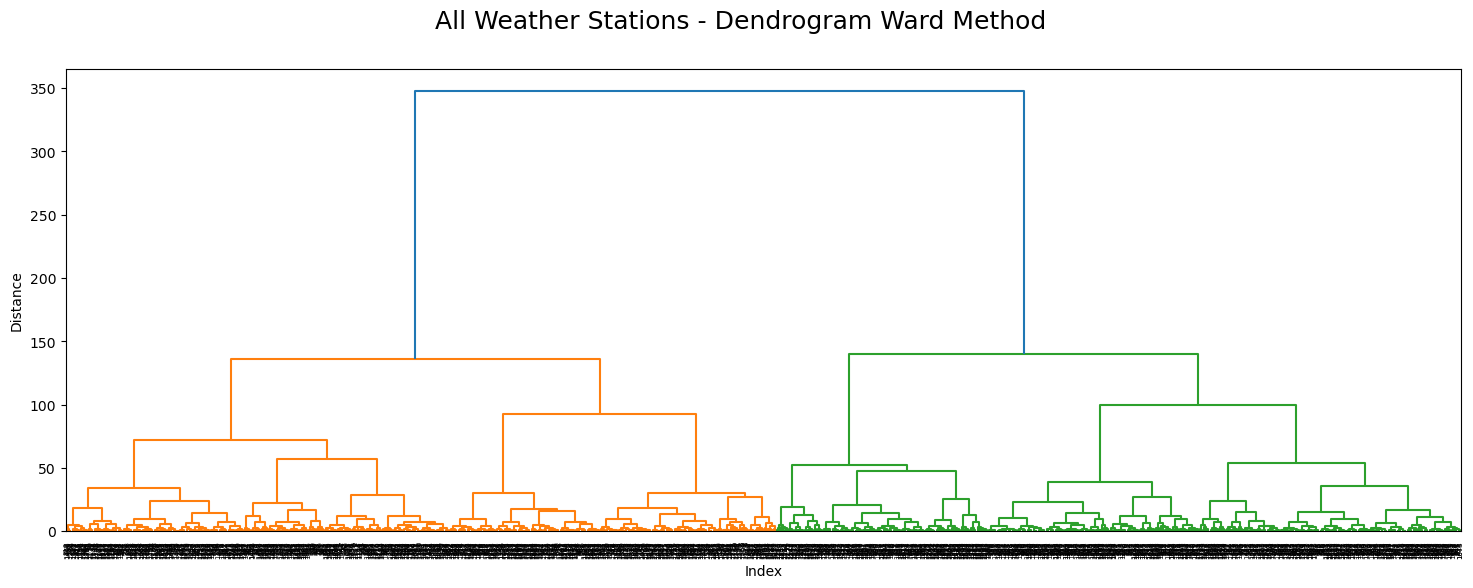

In [38]:
## Ward
distance_ward = linkage(dfPCA2, method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weather Stations - Dendrogram Ward Method",fontsize=18)

In [39]:
from scipy.cluster.hierarchy import fcluster

In [40]:
# Choose a threshold value to cut the dendrogram
threshold = 150

In [41]:
# Create clusters
clusters = fcluster(distance_ward, threshold, criterion='distance')

In [42]:
print(clusters)

[1 1 1 ... 1 1 1]


In [43]:
dfPCA2['Cluster'] = clusters

In [44]:
dfPCA2

,PCA1,PCA2,Cluster
0,-9.214270,2.544134,1
1,-10.242344,-1.410543,1
2,-10.871774,-3.141181,1
3,-10.993187,-5.347170,1
4,-9.855844,-3.664595,1
...,...,...,...
1822,-9.982214,-6.604382,1
1823,-9.134901,-8.936633,1
1824,-8.604392,-6.715401,1
1825,-8.401593,-3.851891,1


In [45]:
dfPCA2.describe()

,PCA1,PCA2,Cluster
count,1.827000e+03,1.827000e+03,1827.000000
mean,3.111298e-16,1.866779e-16,1.490421
std,6.777389e+00,3.586129e+00,0.500045
min,-1.325030e+01,-1.007437e+01,1.000000
25%,-6.195291e+00,-2.577474e+00,1.000000
50%,-2.563060e-01,-1.776399e-01,1.000000
75%,6.158639e+00,2.400299e+00,2.000000
max,1.611225e+01,1.057637e+01,2.000000


([<matplotlib.axis.XTick at 0x230c5f99310>,
 [Text(0, 0, '-13.250298818314672'),
  Text(40, 0, '-10.826245771027894'),
  Text(80, 0, '-9.86017171464443'),
  Text(120, 0, '-9.313775806355459'),
  Text(149, 0, '-8.963344054212996')])

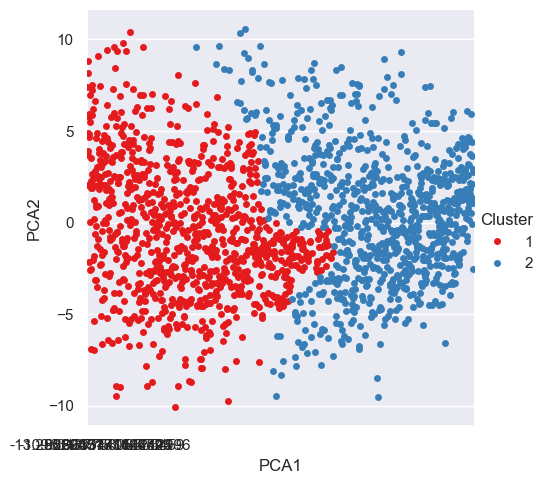

In [46]:
#PLot the 2 components, color coded by Cluster
sns.set_theme()
g = sns.catplot(x="PCA1", y="PCA2", palette='Set1', hue="Cluster", data=dfPCA2)
plt.xticks([0, 40, 80, 120, 149])

In [47]:
pleasant_BASEL = pleasant[['BASEL_pleasant_weather']].copy()

In [48]:
## map each iris species number to a name with a dictionary.
labels = {0: 'Not Pleasant', 1: 'Pleasant'}
pleasant_BASEL['BASEL_pleasant_weather'] = [labels[i] for i in pleasant_BASEL.BASEL_pleasant_weather]

In [50]:
dfPCA2['BASEL_pleasant_weather'] = pleasant_BASEL['BASEL_pleasant_weather']

([<matplotlib.axis.XTick at 0x230d7c1bbd0>,
 [Text(0, 0, '-13.250298818314672'),
  Text(40, 0, '-10.826245771027894'),
  Text(80, 0, '-9.86017171464443'),
  Text(120, 0, '-9.313775806355459'),
  Text(149, 0, '-8.963344054212996')])

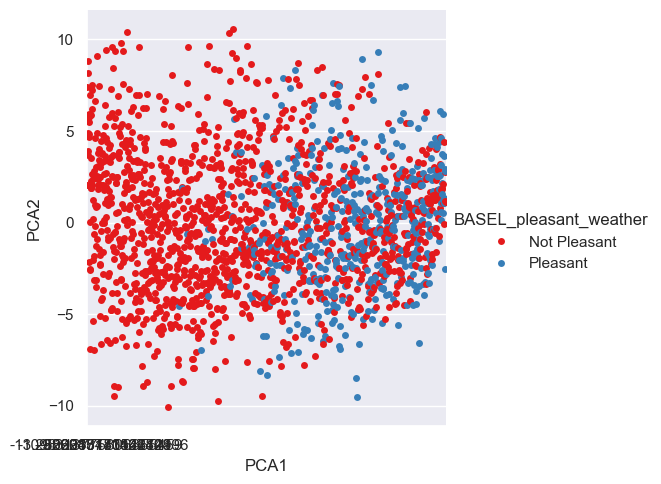

In [51]:
sns.set_theme()
g = sns.catplot(x="PCA1", y="PCA2", palette='Set1', hue="BASEL_pleasant_weather", data=dfPCA2)
plt.xticks([0, 40, 80, 120, 149])

In [52]:
pleasant_DUSSELDORF = pleasant[['DUSSELDORF_pleasant_weather']].copy()

In [53]:
pleasant_DUSSELDORF['DUSSELDORF_pleasant_weather'] = [labels[i] for i in pleasant_DUSSELDORF.DUSSELDORF_pleasant_weather]

In [54]:
dfPCA2['DUSSELDORF_pleasant_weather'] = pleasant_DUSSELDORF['DUSSELDORF_pleasant_weather']

([<matplotlib.axis.XTick at 0x230dbb15850>,
 [Text(0, 0, '-13.250298818314672'),
  Text(40, 0, '-10.826245771027894'),
  Text(80, 0, '-9.86017171464443'),
  Text(120, 0, '-9.313775806355459'),
  Text(149, 0, '-8.963344054212996')])

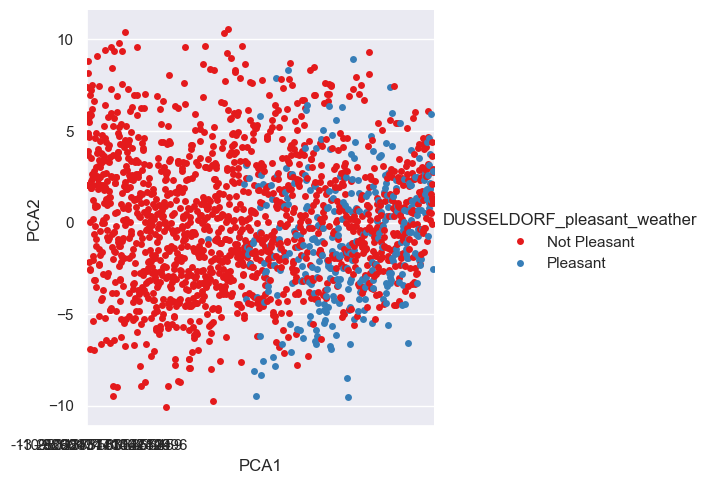

In [55]:
sns.set_theme()
g = sns.catplot(x="PCA1", y="PCA2", palette='Set1', hue="DUSSELDORF_pleasant_weather", data=dfPCA2)
plt.xticks([0, 40, 80, 120, 149])